In [10]:
#import all the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, r2_score


In [11]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(url, names=columns)

# Replace missing values (?) with NaN and convert to numerical
data.replace('?', pd.NA, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Display basic info
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  24

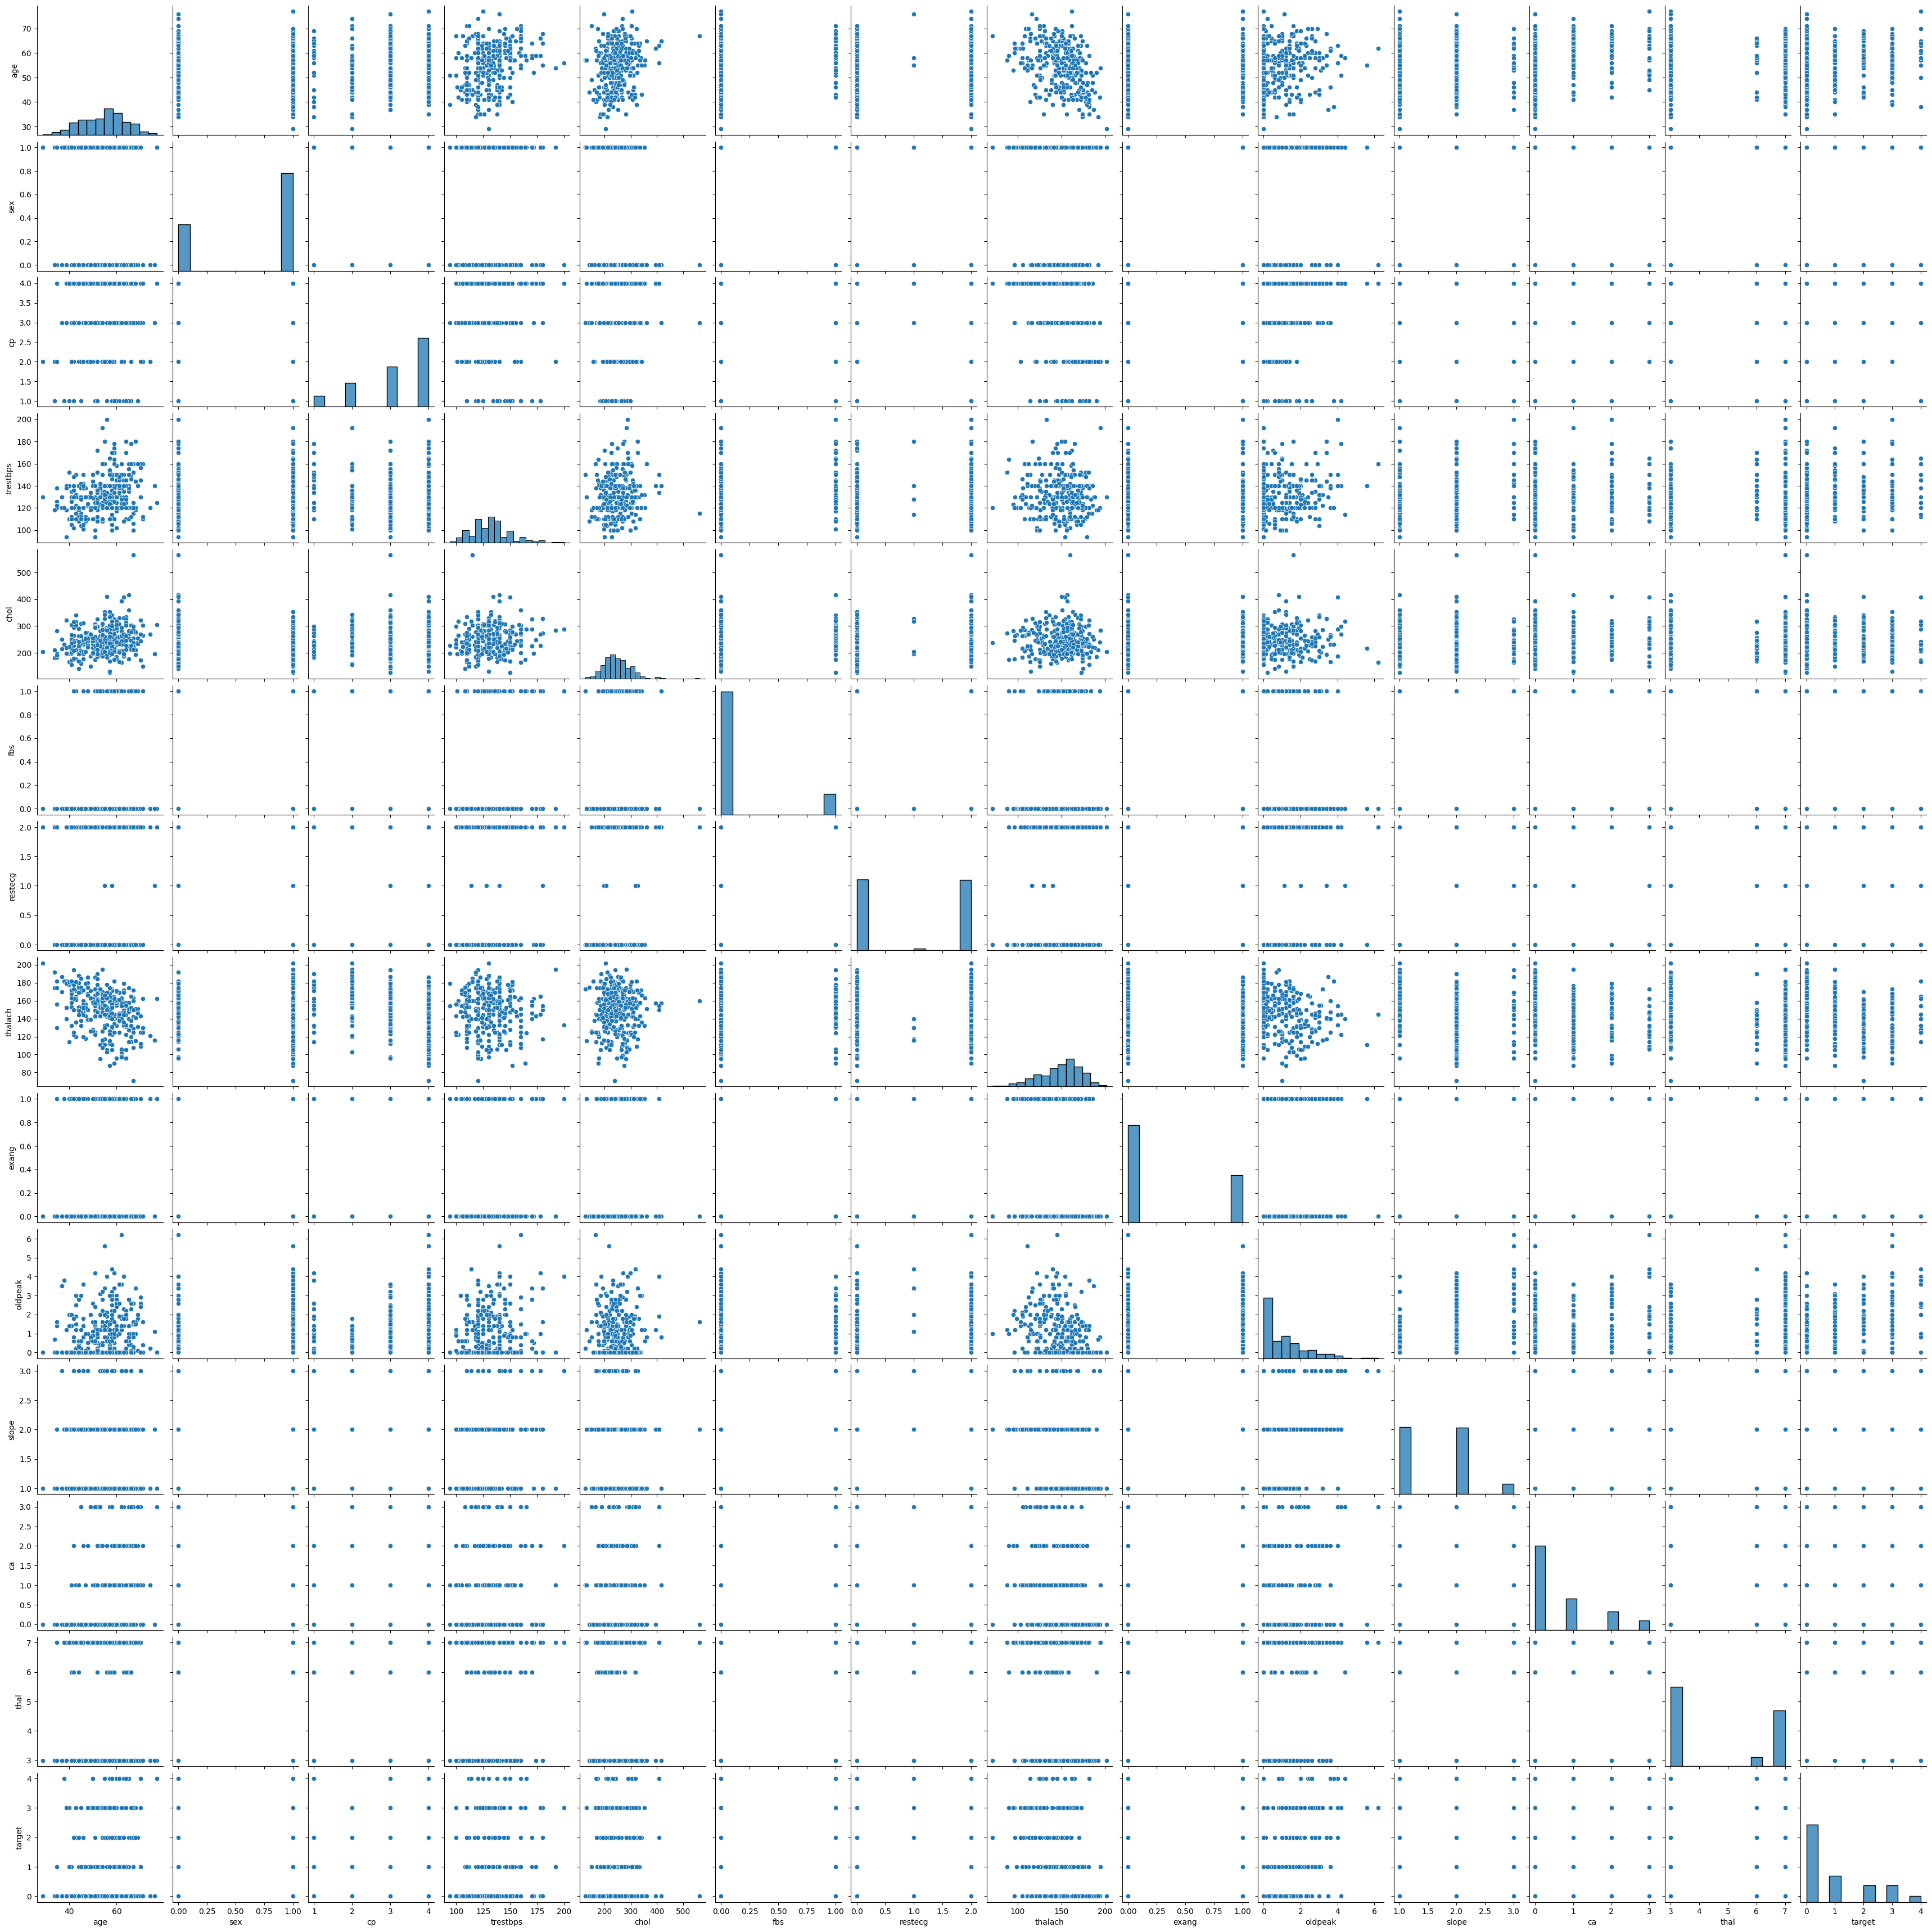

In [12]:
sns.pairplot(data = data)

C:\Users\harys\AppData\Local\Temp\ipykernel_8948\1609170332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='cp', palette='viridis')


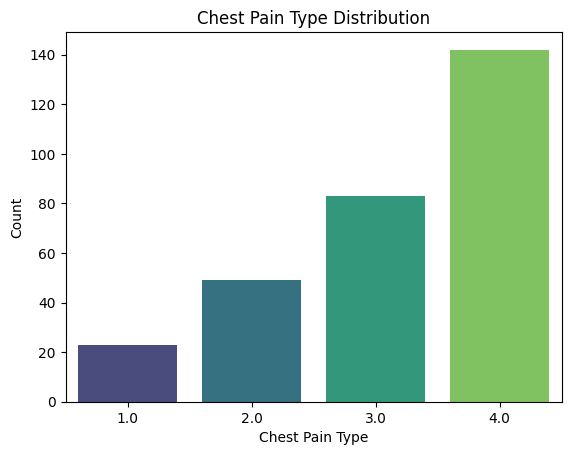

In [13]:
# Bar plot for chest pain type (cp)
sns.countplot(data=data, x='cp', palette='viridis')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


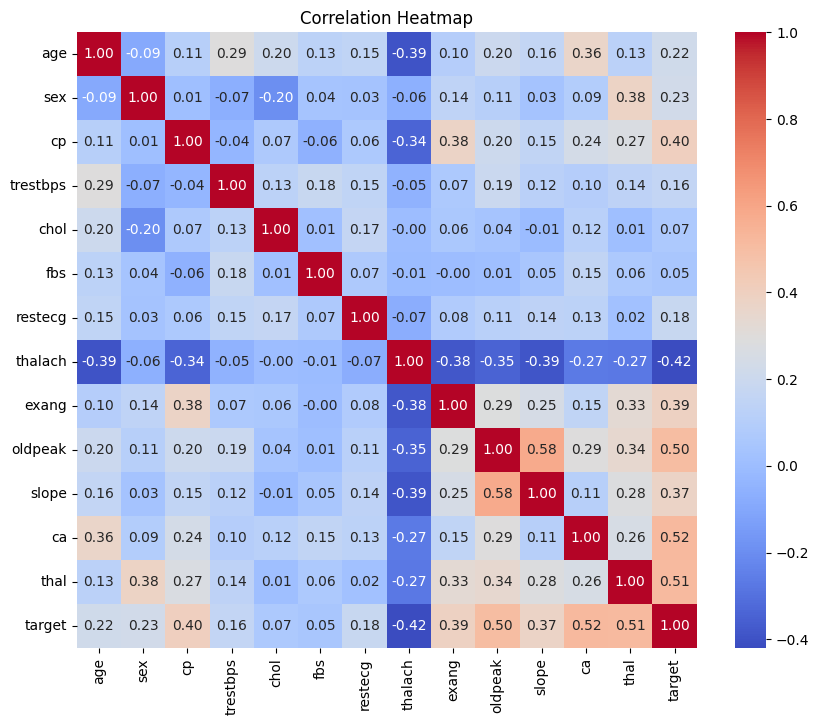

In [14]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


C:\Users\harys\AppData\Local\Temp\ipykernel_8948\3440712108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target', y='chol', palette='Set2')


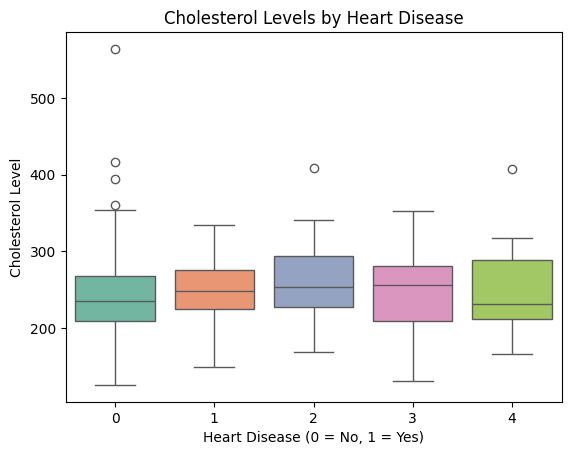

In [15]:
# Boxplot of cholesterol levels by target
sns.boxplot(data=data, x='target', y='chol', palette='Set2')
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level')
plt.show()


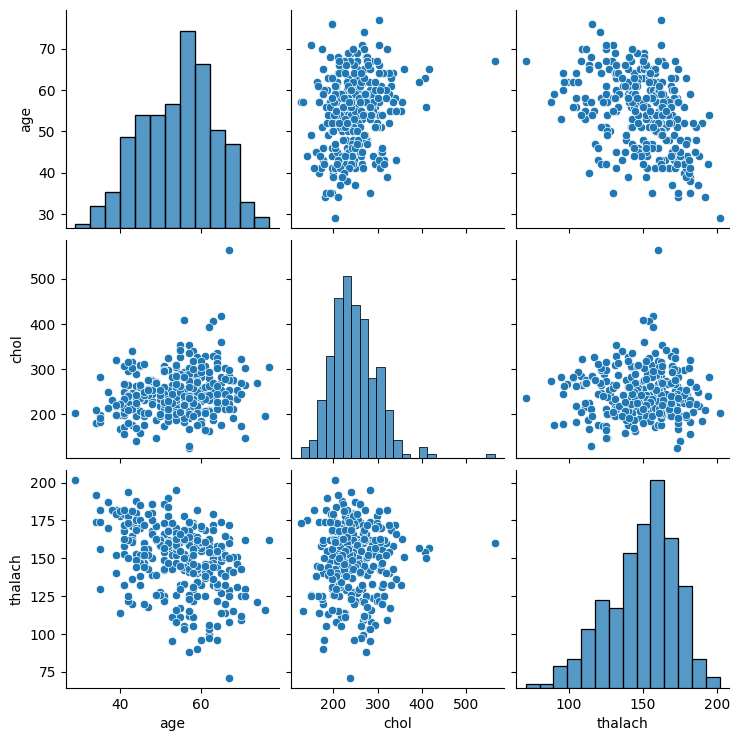

In [16]:
selected_columns = data[['age', 'chol', 'thalach']]
sns.pairplot(data=selected_columns)

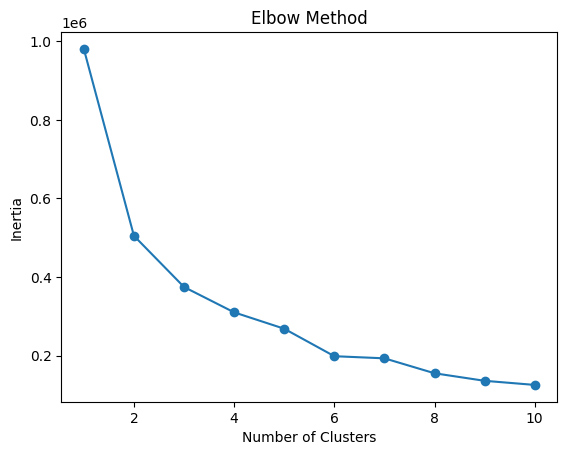

In [17]:
# Select features for clustering
features = data[['age', 'chol', 'thalach']]

# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


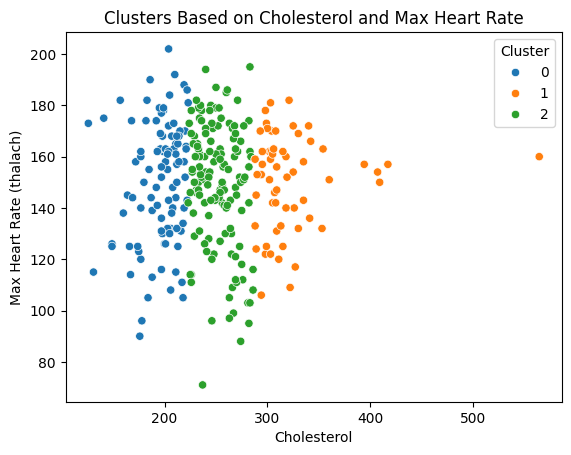

In [18]:
# Fit KMeans with optimal clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

# Visualize clusters
sns.scatterplot(data=data, x='chol', y='thalach', hue='cluster', palette='tab10')
plt.title('Clusters Based on Cholesterol and Max Heart Rate')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate (thalach)')
plt.legend(title='Cluster')
plt.show()


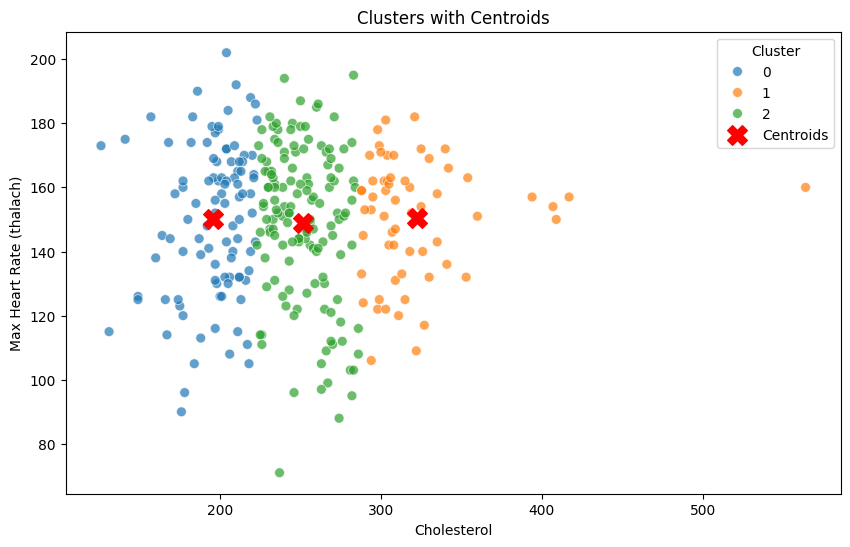

In [19]:
# Features for clustering
features = data[['age', 'chol', 'thalach']]

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

# Get centroids
centroids = kmeans.cluster_centers_

# Plot clusters with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='chol', y='thalach', hue='cluster', palette='tab10', s=50, alpha=0.7)
plt.scatter(centroids[:, 1], centroids[:, 2], s=200, c='red', marker='X', label='Centroids')
plt.title('Clusters with Centroids')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate (thalach)')
plt.legend(title='Cluster')
plt.show()


In [20]:
# Print centroids
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Age={centroid[0]:.2f}, Cholesterol={centroid[1]:.2f}, Max Heart Rate={centroid[2]:.2f}")


Centroid 1: Age=51.88, Cholesterol=195.81, Max Heart Rate=150.17
Centroid 2: Age=56.33, Cholesterol=322.50, Max Heart Rate=150.35
Centroid 3: Age=55.67, Cholesterol=251.65, Max Heart Rate=148.86


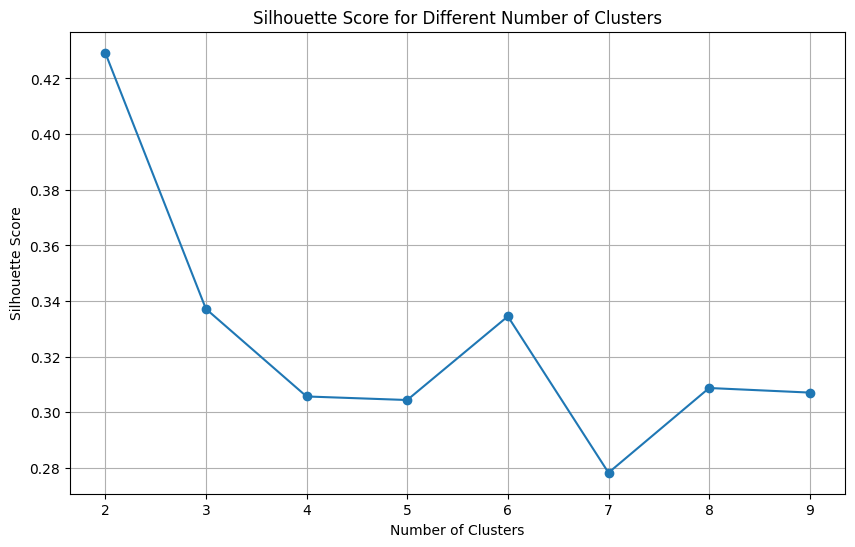

In [21]:
# Silhouette scores for different numbers of clusters
silhouette_scores = []
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    score = silhouette_score(features, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [22]:
# Compute silhouette score for 3 clusters (chosen earlier)
final_silhouette_score = silhouette_score(features, data['cluster'])
print(f"Silhouette Score for 3 clusters: {final_silhouette_score:.2f}")


Silhouette Score for 3 clusters: 0.34


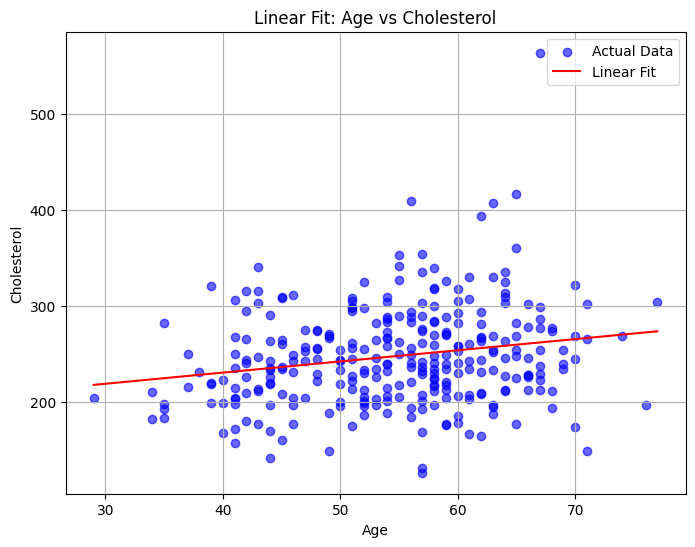

Linear Regression R²: 0.041
Mean Squared Error: 2583.991


C:\Users\harys\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harys\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


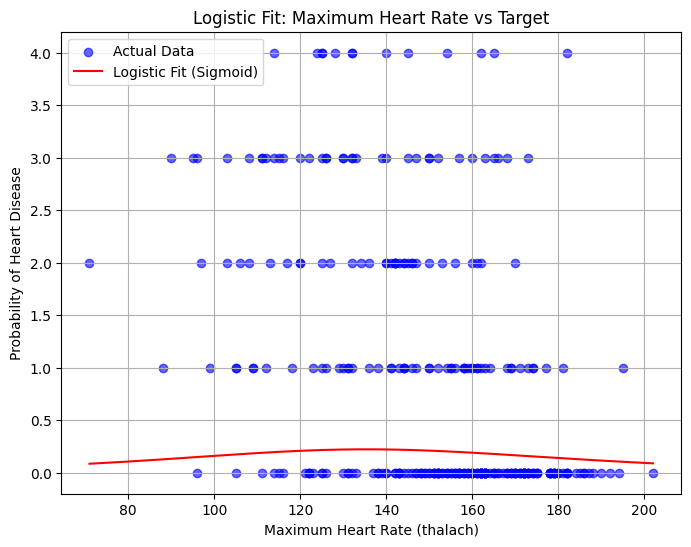


Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        36
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.13      0.20      0.15        60
weighted avg       0.38      0.60      0.46        60

Accuracy: 0.600


C:\Users\harys\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harys\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harys\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, r2_score

# Load the dataset
# Replace 'heart.csv' with the path to your dataset

# Feature selection (choose independent and dependent variables)
# Example for linear regression: Predicting cholesterol ('chol') based on age ('age')
X_linear = data[['age']].values  # Independent variable
y_linear = data['chol'].values  # Dependent variable

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_linear, y_linear)

# Predict and visualize linear regression
x_range = np.linspace(min(X_linear), max(X_linear), 100).reshape(-1, 1)
y_pred_linear = linear_model.predict(x_range)

# Plot Linear Fit
plt.figure(figsize=(8, 6))
plt.scatter(X_linear, y_linear, color='blue', label='Actual Data', alpha=0.6)
plt.plot(x_range, y_pred_linear, color='red', label='Linear Fit')
plt.title('Linear Fit: Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.grid()
plt.show()

# Print Linear Regression Metrics
print(f"Linear Regression R²: {linear_model.score(X_linear, y_linear):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_linear, linear_model.predict(X_linear)):.3f}")

# Logistic Regression (for binary classification on target variable 'target')
X_logistic = data[['thalach']]  # Feature: Maximum heart rate
y_logistic = data['target']  # Binary Target: 0 (No Disease) or 1 (Disease)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and Probabilities
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Visualize Logistic Fit (Sigmoid Curve)
x_fit = np.linspace(X_logistic.min(), X_logistic.max(), 300).reshape(-1, 1)
y_fit = logistic_model.predict_proba(x_fit)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X_logistic, y_logistic, color='blue', label='Actual Data', alpha=0.6)
plt.plot(x_fit, y_fit, color='red', label='Logistic Fit (Sigmoid)')
plt.title('Logistic Fit: Maximum Heart Rate vs Target')
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('Probability of Heart Disease')
plt.legend()
plt.grid()
plt.show()

# Print Logistic Regression Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")